# (Explanatory  Data Analysis )
## Using (Titanic Data)

## Investigation Overview

> who survived in titanic and search about parameters affected on it?

## Dataset Overview

> ## Parameters 
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

>sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

>parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from plots import draw_hist
%matplotlib inline
%load_ext autoreload

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> pclass is numeric I converted it to objects to understand(1st = Upper 2nd = Middle 3rd = Lower),
> I extract new features (family_size) from SibSp and Parch Columns ,and extract other feature (Fare_Per_Person) 
> from family_size and fare columns. I noticed 2 row null values in Emabrked Columns then I fill it by Mode.

## ( Univariate Exploration)

> I explore Passengers different Ages  on Titanic  ,I explore numbers of passenger in each class.


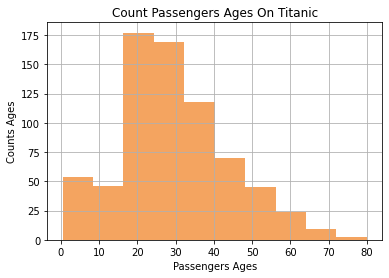

In [25]:
df['Age'].hist(color='sandybrown')
plt.title("Count Passengers Ages On Titanic")
plt.xlabel('Passengers Ages')
plt.ylabel('Counts Ages')
plt.show()

> most  passengers ages are between 20 to 40 and max of age is 80

In [29]:
df.Pclass=df.Pclass.astype(str)
df["Pclass"].replace({"1": "Upper", "2": "Middle","3":"Lower"}, inplace=True)


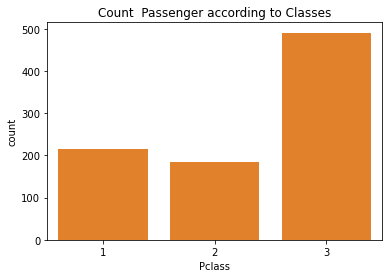

In [24]:
default_color = sb.color_palette()[1]
sb.countplot(x=df["Pclass"],data=df,color=default_color)
plt.title("Count  Passenger according to Classes")
plt.show()

> The lower p class we found a lot of passengers compared to  other classes

##  Bivariate Exploration
> I explore realtionship between ages and who survived and Are the smallest age Survived than Older?

> I explore realtionship does Embarked Column affects to Survival?

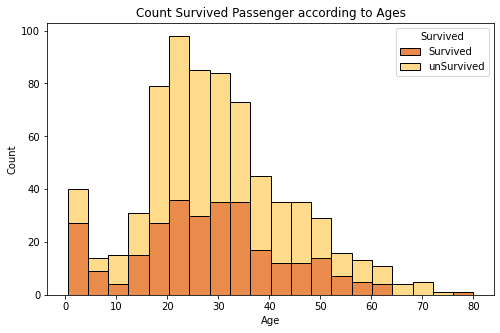

In [23]:
plt.figure(figsize=[8, 5])
plt.title("Count Survived Passenger according to Ages")
draw_hist(df,'Age','Survived',['Survived', 'unSurvived'],'Survived','stack',palette="YlOrBr")


>the most passengers survive who the age in middle at age 30 and the age greater than 60 most of passengers don't survive.

In [8]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

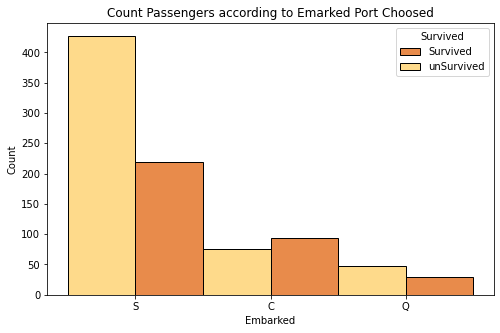

In [10]:
plt.figure(figsize=[8, 5])
plt.title("Count Passengers according to Emarked Port Choosed")
draw_hist(df,'Embarked','Survived',['Survived', 'unSurvived'],'Survived','dodge',palette="YlOrBr")



>Emarked C Survived greater than unServived and most of passengers found at Emarked C 

## Multivariate Exploration
Explore who survived according to gender and Family Size. Does the passenger who travels alone is survived?

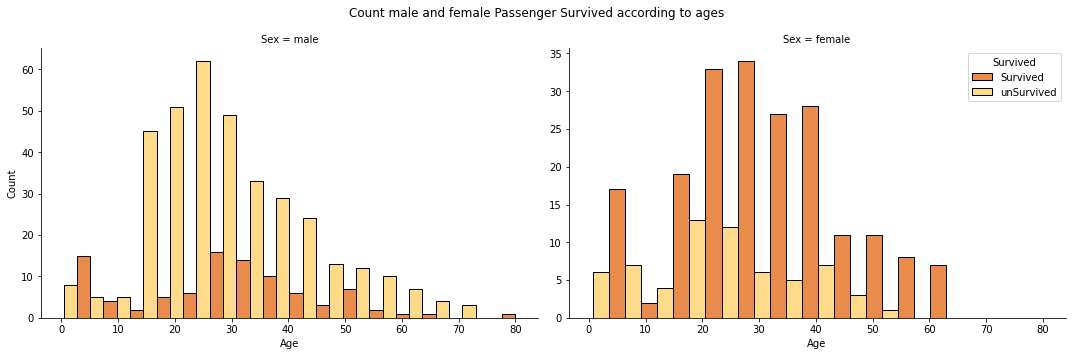

In [19]:
g = sb.FacetGrid(data = df, col = 'Sex', height = 5, aspect = 1.5,sharey=False)
g.map_dataframe(sb.histplot,x= 'Age', hue='Survived',multiple='dodge',palette="YlOrBr")
plt.legend(title='Survived', labels=['Survived', 'unSurvived'])
g.set_xlabels('Age')
g.set_ylabels('Count')
g.fig.suptitle('Count male and female Passenger Survived according to ages')
g.fig.tight_layout()
plt.show()

>female passengers more Survival than male in titatic

In [17]:
df['Family_Size']=df['SibSp']+df['Parch']

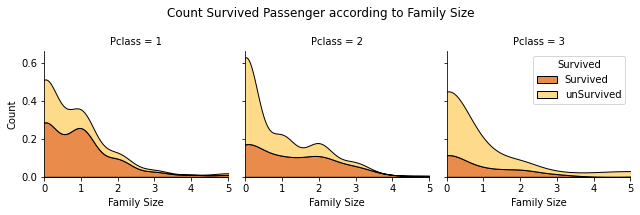

In [22]:
g = sb.FacetGrid(df, col='Pclass')
g.map_dataframe(sb.kdeplot, x='Family_Size', hue='Survived',multiple="stack",palette="YlOrBr")
plt.legend(title='Survived', labels=['Survived', 'unSurvived'])
plt.xticks(np.arange(df['Family_Size'].min(),df['Family_Size'].max()+1,1))
plt.xlim(0,5)
g.set_xlabels('Family Size')
g.set_ylabels('Count')
g.fig.suptitle('Count Survived Passenger according to Family Size')
g.fig.tight_layout()
plt.show()

>we found when family size increase, number of survival decrease than unsurvived.  and at middle class the unsurvival decreses than upper and lower.

 ## Thank you so much for your interest and attention

In [37]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 578401 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\INTEL\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\INTEL\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\INTEL\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\INTEL\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\INTEL\anaconda3\lib\site-packages\nbconvert\nbconv